#**Deskripsi Dataset**

Data ini berisi data kasus harian Covid-19 di Kabupaten Kutai Timur.

Atribut pada data ini mencakup
1. Terkonfirmasi: berisi jumlah kumulatif pasien yang terkonfirmasi Covid-19
2. Sembuh: berisi jumlah pasien yang berhasil sembuh dari Covid-19
3. Meninggal: berisi jumlah pasien yang meninggal akibat Covid-19
4. Suspek: berisi jumlah pasien dengan riwayat penyakit ISPA Berat, gagal nafas akibat aveoli paru-paru penuh cairan (ARDS), atau meninggal dengan gambaran klinis yang meyakinkan COVID-19
5. Probable: berisi jumlah pasien yang diyakini sebagai suspek DAN belum ada hasil pemeriksaan laboratorium RT-PCR.
6. Discarded: berisi jumlah pasien dengan status kasus suspek dengan hasil pemeriksaan RT-PCR 2 kali negatif selama 2 hari berturut-turut dengan selang waktu >24 jam, ATAU Seseorang dengan status kontak erat yang telah menyelesaikan masa karantina selama 14 hari.
7. Kontak Erat: berisi jumlah pasien yang memiliki riwayat kontak dengan kasus probable atau konfirmasi COVID-19
8. Pelaku Perjalanan: berisi jumlah pasien yang melakukan perjalanan dari dalam negeri (domestik) maupun luar negeri pada 14 hari terakhir.

#**Melakukan Import Library**

In [ ]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math
import statistics as st
from scipy.stats import norm, poisson
import datetime as datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## **Membaca Data set**

In [ ]:
# Memberi hak akses ke google drive
from google.colab import drive
drive.mount('/content/drive')

# Membaca dataset dari file csv
df = pd.read_csv("/content/drive/MyDrive/2ia21/smt3/statistika/Kelompok4_2IA21/covid-19-kutaitimur.csv")

Mounted at /content/drive


In [ ]:
df

,Nomor,Tanggal,Terkonfirmasi,Sembuh,Meninggal,Suspek,Probable,Discarded,Kontak_erat,Pelaku_perjalanan,Total_Kasus
0,1,7/22/2020,91,75,1,642.0,NaN,1453.0,NaN,NaN,91
1,2,7/29/2020,8,13,0,302.0,NaN,186.0,NaN,NaN,99
2,3,7/30/2020,5,0,0,302.0,NaN,186.0,NaN,NaN,104
3,4,8/1/2020,1,0,0,308.0,NaN,186.0,NaN,NaN,105
4,5,8/2/2020,0,1,0,308.0,NaN,186.0,NaN,NaN,105
...,...,...,...,...,...,...,...,...,...,...,...
219,220,8/17/2021,229,500,18,4054.0,48.0,NaN,8042,NaN,16087
220,221,8/19/2021,208,314,4,4054.0,48.0,NaN,8042,NaN,16295
221,222,8/20/2021,99,134,4,4054.0,48.0,NaN,8042,NaN,16394
222,223,8/21/2021,77,129,4,4054.0,48.0,NaN,8042,NaN,16471


Data tersebut tersebut berisi 10 atribut dan 224 record

##**Understanding Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nomor              224 non-null    int64  
 1   Tanggal            224 non-null    object 
 2   Terkonfirmasi      224 non-null    int64  
 3   Sembuh             224 non-null    int64  
 4   Meninggal          224 non-null    int64  
 5   Suspek             223 non-null    float64
 6   Probable           197 non-null    float64
 7   Discarded          218 non-null    float64
 8   Kontak_erat        173 non-null    object 
 9   Pelaku_perjalanan  85 non-null     object 
 10  Total_Kasus        224 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 19.4+ KB


* Atribut No, Terkonfirmasi, Sembuh, dan Meninggal berisi data yang bertipe data integer.
* Atribut tanggal, Kontak_erat, dan Pelaku_perjalanan berisi data yang bertipe data object.
* Atribut Suspek, Probable, dan Discarded berisi data yang bertipe data float64.

# **Data Preparation**

###**1. Mencari tau apakah ada data yang duplikat**

In [ ]:
df.duplicated().sum()

0

Tidak ada data yang duplikat

###**2. Membuat dataframe baru dari dataset sebelumnya**

**2.1. Memilih atribut yang akan digunakan**

In [ ]:
start_no = 58
end_no = 87

# Memilih baris atau record bulan Oktober 2020
selected_records = df.loc[(df['Nomor'] >= start_no) & (df['Nomor'] <= end_no)]

# Memilih kolom atau atribut tertentu
selected_cols = ['Nomor', 'Tanggal', 'Terkonfirmasi', 'Sembuh', 'Meninggal', 'Total_Kasus']
df_selected = selected_records[selected_cols]

print(df_selected.shape)

(30, 6)


Kita akan menggunakan 4 atribut (Tanggal, Tekonfirmasi, Sembuh, Meninggal) yang terdiri atas 224 records.

**2.2. Mengetahui sample data baru**

In [ ]:
df_selected

,Nomor,Tanggal,Terkonfirmasi,Sembuh,Meninggal,Total_Kasus
57,58,10/1/2020,19,1,0,436
58,59,10/2/2020,20,2,0,456
59,60,10/3/2020,18,53,1,474
60,61,10/4/2020,1,5,0,475
61,62,10/5/2020,29,29,0,504
62,63,10/6/2020,14,19,0,518
63,64,10/7/2020,33,0,0,551
64,65,10/8/2020,33,16,0,584
65,66,10/9/2020,15,4,0,599
66,67,10/10/2020,56,7,1,655


**2.3. Mengetahui deskripsi dari setiap atribut**

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 57 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nomor          30 non-null     int64 
 1   Tanggal        30 non-null     object
 2   Terkonfirmasi  30 non-null     int64 
 3   Sembuh         30 non-null     int64 
 4   Meninggal      30 non-null     int64 
 5   Total_Kasus    30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.6+ KB


*   Terdapat 4 atribut dengan tipe data int64 (No, Terkonfirmasi, Sembuh, dan Meninggal)
*   Terdapat 1 atribut dengan tipe data object (Tanggal)



**2.4. Mengecek apakah ada data yang bersifat NULL**

In [ ]:
df_selected.isna().sum()

Nomor            0
Tanggal          0
Terkonfirmasi    0
Sembuh           0
Meninggal        0
Total_Kasus      0
dtype: int64

Tidak ada data yang bersifat NULL

##**Data Analysis and Visualization**

### **1. Membuat table distribusi frekuensi relatif dari kasus sembuh**

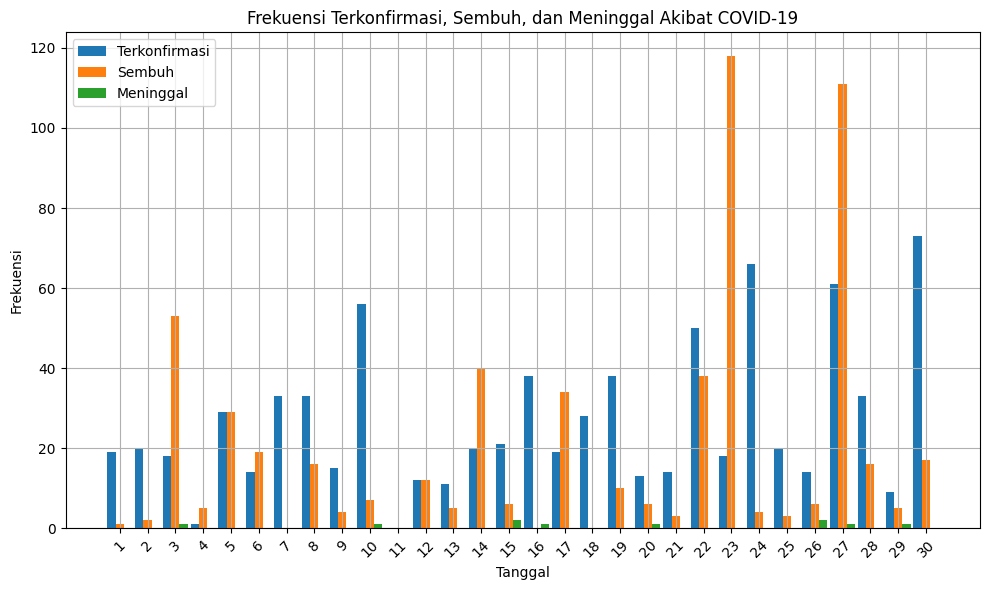

In [ ]:
interval_waktu = range(1, 31)

plt.figure(figsize=(10, 6))
width = 0.3

plt.bar(interval_waktu, df_selected['Terkonfirmasi'], width=width, label='Terkonfirmasi')
plt.bar([i + width for i in interval_waktu], df_selected['Sembuh'], width=width, label='Sembuh')
plt.bar([i + width * 2 for i in interval_waktu], df_selected['Meninggal'], width=width, label='Meninggal')

plt.title('Frekuensi Terkonfirmasi, Sembuh, dan Meninggal Akibat COVID-19')
plt.xlabel('Tanggal')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.xticks([i + width for i in interval_waktu], interval_waktu, rotation=45)

plt.tight_layout()
plt.show()

**Kesimpulan** :
* Jumlah kasus **positif** terbanyak, terjadi pada tanggal 23/10/2020 yaitu sebanyak 73 pasien.
* Jumlah kasus **sembuh** terbanyak, terjadi pada tanggal 30/10/2020 yaitu sebanyak 118 pasien.
* Jumlah kasus **meninggal** terbanyak, terjadi pada tanggal 15 dan 26 /10/2020 yaitu sebanyak 2 pasien.

**1.1. Menghitung nilai N (Jumlah Data)**

In [ ]:
n = len(df_selected['Sembuh'])
print('Nilai n = ', n)

Nilai n =  30


**1.2. Menghitung nilai K (Jumlah Kelas)**

In [ ]:
k = int (np.ceil(1 +( 3.322 * np.log10(n))))

print('Nilai k = ', k)

Nilai k =  6


**1.3. Menghitung nilai max dan min dari kasus sembuh**

In [ ]:
Sembuh_min = df_selected['Sembuh'].min()
Sembuh_max = df_selected['Sembuh'].max()

print('Nilai Min = ', Sembuh_min)
print('Nilai Max = ', Sembuh_max)

Nilai Min =  0
Nilai Max =  118


**1.4. Menghitung nilai i (Interval kelas)**

In [ ]:
i = int(np.ceil(Sembuh_max - Sembuh_min) / k)

print('Nilai i = ', i)

Nilai i =  19


**1.5. Membuat table distribusi frekuensi relatif (TDF-Relatif)** (SS)

In [ ]:
# Membuat interval kelas hingga batas atas tidak melebihi 1213
intervals = []
while Sembuh_min <= Sembuh_max:
    intervals.append((Sembuh_min, min(Sembuh_min + i, 1213)))
    Sembuh_min = intervals[-1][1] + 1

# Menghitung titik tengah setiap interval kelas
titik_tengah = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Menghitung frekuensi di setiap interval kelas
frekuensi = []
for interval in intervals:
    count = ((df_selected['Sembuh'] >= interval[0]) & (df_selected['Sembuh'] <= interval[1])).sum()
    frekuensi.append(count)

# Membuat DataFrame untuk tabel distribusi frekuensi relatif
df = pd.DataFrame({
    'Sembuh': [f"({interval[0]} - {interval[1]})" for interval in intervals],
    'Titik Tengah (Xi)': titik_tengah,
    'Frekuensi (Fi)': frekuensi,
})

# Menghitung total frekuensi
total_frekuensi = df['Frekuensi (Fi)'].sum()

# Menghitung frekuensi relatif
df['Frekuensi Relatif'] = df['Frekuensi (Fi)'] / total_frekuensi

# Menambahkan kolom frekuensi relatif dalam persen
df['Frekuensi Relatif (%)'] = df['Frekuensi Relatif'] * 100

# Menampilkan tabel distribusi frekuensi relatif
print(df.to_string(index=False))

# Menampilkan jumlah total frekuensi dari seluruh data
print('')
print('Total Frekuensi (n) = ', total_frekuensi)

     Sembuh  Titik Tengah (Xi)  Frekuensi (Fi)  Frekuensi Relatif  Frekuensi Relatif (%)
   (0 - 19)                9.5              23           0.766667              76.666667
  (20 - 39)               29.5               3           0.100000              10.000000
  (40 - 59)               49.5               2           0.066667               6.666667
  (60 - 79)               69.5               0           0.000000               0.000000
  (80 - 99)               89.5               0           0.000000               0.000000
(100 - 119)              109.5               2           0.066667               6.666667

Total Frekuensi (n) =  30


**1.6. Membuat Visualisasi Hasil Tabel Distribusi Frekuensi ke Dalam Bentuk Diagram Histogram**

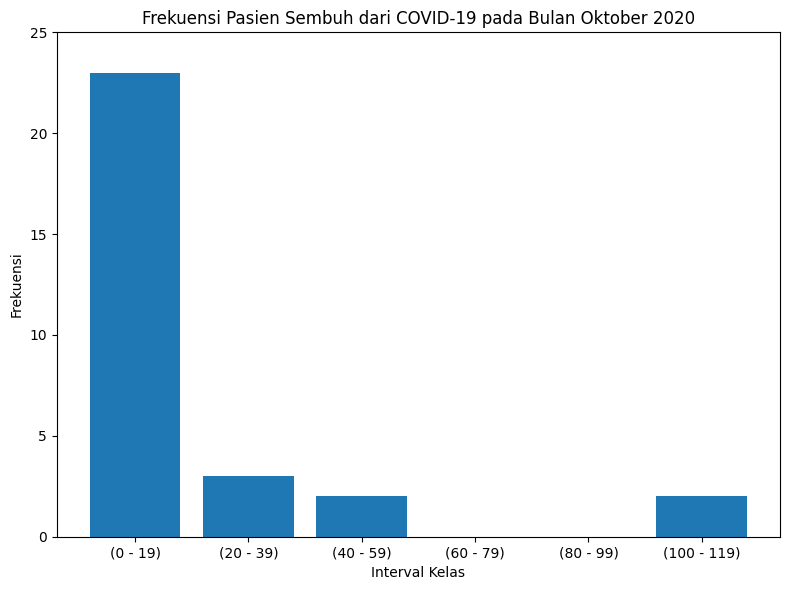

In [ ]:
intervals = [(0, 19), (20, 39), (40, 59), (60, 79), (80, 99), (100, 119)]
frekuensi = [23, 3, 2, 0, 0, 2]
labels = [f"({interval[0]} - {interval[1]})" for interval in intervals]

plt.figure(figsize=(8, 6))
plt.bar(range(len(intervals)), frekuensi, width=0.8, align='center')

plt.xticks(range(len(intervals)), labels)
plt.xlabel('Interval Kelas')
plt.ylabel('Frekuensi')
plt.ylim(0, 25)

plt.title('Frekuensi Pasien Sembuh dari COVID-19 pada Bulan Oktober 2020')

plt.tight_layout()
plt.show()

**1.7. Visualisasi Data Frekuensi Kasus Pasien Sembuh dari COVID-19**

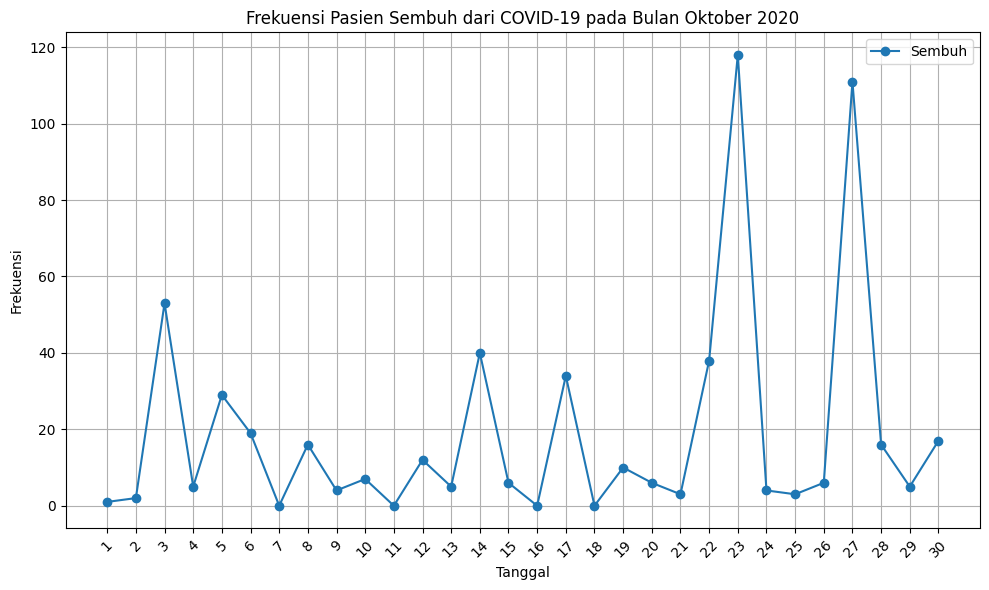

In [ ]:
interval_waktu = range(1, 31)

plt.figure(figsize=(10, 6))

plt.plot(interval_waktu, df_selected['Sembuh'], marker='o', label='Sembuh')

plt.title('Frekuensi Pasien Sembuh dari COVID-19 pada Bulan Oktober 2020')
plt.xlabel('Tanggal')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.xticks(interval_waktu, rotation=45)

plt.tight_layout()
plt.show()

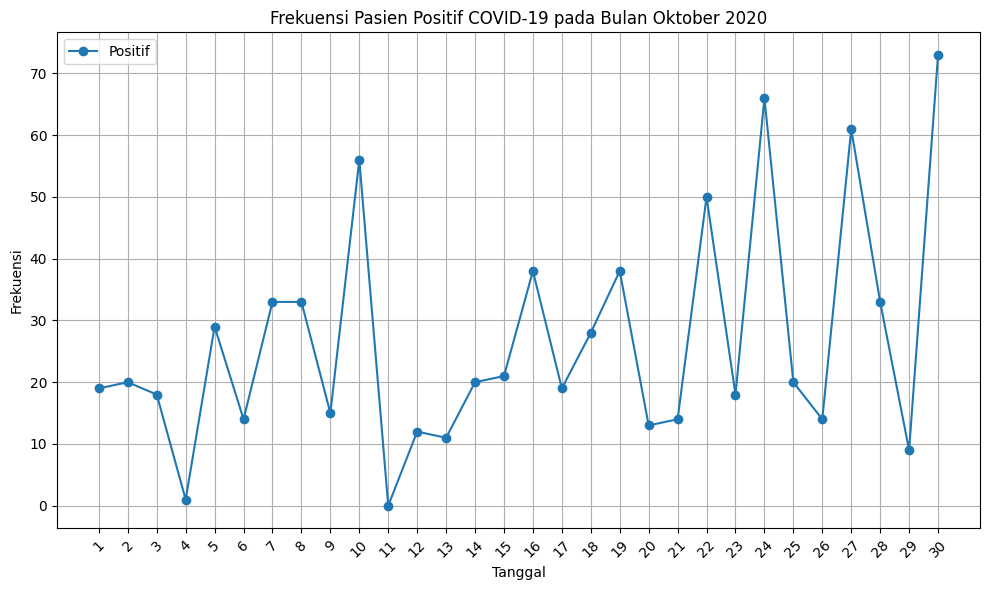

In [ ]:
interval_waktu = range(1, 31)

plt.figure(figsize=(10, 6))

plt.plot(interval_waktu, df_selected['Terkonfirmasi'], marker='o', label='Positif')

plt.title('Frekuensi Pasien Positif COVID-19 pada Bulan Oktober 2020')
plt.xlabel('Tanggal')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.xticks(interval_waktu, rotation=45)

plt.tight_layout()
plt.show()

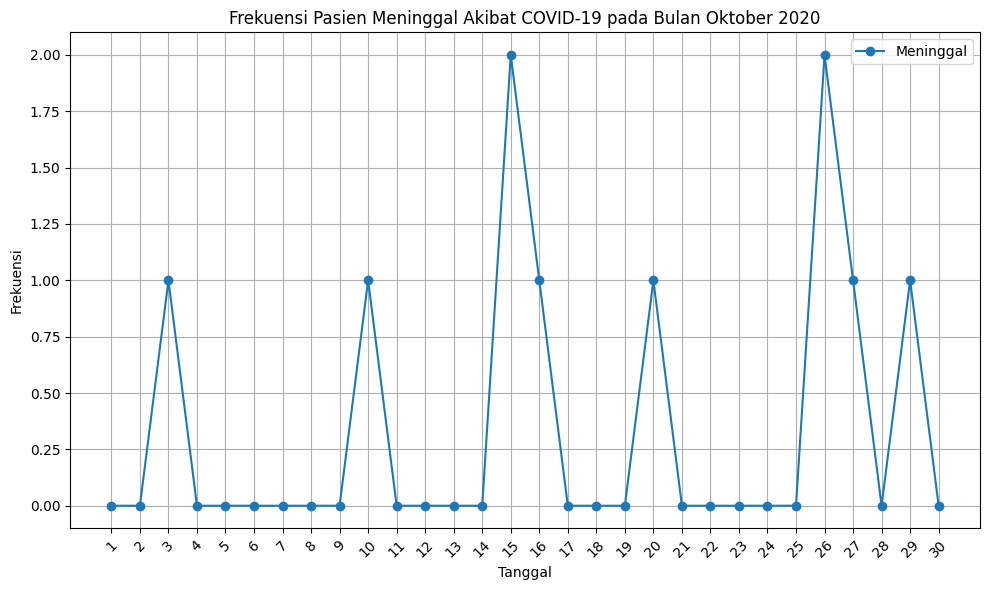

In [ ]:
interval_waktu = range(1, 31)

plt.figure(figsize=(10, 6))

plt.plot(interval_waktu, df_selected['Meninggal'], marker='o', label='Meninggal')

plt.title('Frekuensi Pasien Meninggal Akibat COVID-19 pada Bulan Oktober 2020')
plt.xlabel('Tanggal')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.xticks(interval_waktu, rotation=45)

plt.tight_layout()
plt.show()

###**2. Mengihuting Nilai Probabilitas**

**2.1. Mengitung Nilai Probabilitas Positif COVID-19**

In [ ]:
jumlah_positif_oktober = df_selected['Terkonfirmasi'].dropna().sum()
total_positif_sampai_okt = 1213
print(f"Jumlah kasus positif di bulan Oktober : {jumlah_positif_oktober}")
print(f"Jumlah kasus positif sampai bulan Oktober: {total_positif_sampai_okt}")

probabilitas_positif = (jumlah_positif_oktober/total_positif_sampai_okt)
print(f"Probabilitas pasien positif Covid-19 pada bulan Oktober di Kabupaten Kutai Timur adalah: {probabilitas_positif*100}%")

Jumlah kasus positif di bulan Oktober : 796
Jumlah kasus positif sampai bulan Oktober: 1213
Probabilitas pasien positif Covid-19 pada bulan Oktober di Kabupaten Kutai Timur adalah: 65.62242374278648%


**2.2. Mengitung Nilai Probabilitas Sembuh dari COVID-19**

In [ ]:
jumlah_sembuh = df_selected['Sembuh'].dropna().sum()
jumlah_positif = df_selected['Terkonfirmasi'].dropna().sum()
print(f"Jumlah kasus sembuh : {jumlah_sembuh}")
print(f"Jumlah kasus positif: {jumlah_positif}")

probabilitas_sembuh = (jumlah_sembuh/jumlah_positif)
print(f"Probabilitas pasien sembuh dari Covid-19 di Kabupaten Kutai Timur adalah: {probabilitas_sembuh*100}%")

Jumlah kasus sembuh : 570
Jumlah kasus positif: 796
Probabilitas pasien sembuh dari Covid-19 di Kabupaten Kutai Timur adalah: 71.60804020100502%


**2.3. Mengitung Nilai Probabilitas Meninggal akibat COVID-19**

In [ ]:
jumlah_meninggal = df_selected['Meninggal'].dropna().sum()
jumlah_positif = df_selected['Terkonfirmasi'].dropna().sum()
print(f"Jumlah kasus meninggal : {jumlah_meninggal}")
print(f"Jumlah kasus positif: {jumlah_positif}")

probabilitas_meninggal = (jumlah_meninggal / jumlah_positif)
print(f"Probabilitas pasien meninggal akibat Covid-19 di Kabupaten Kutai Timur adalah: {probabilitas_meninggal*100}%")

Jumlah kasus meninggal : 10
Jumlah kasus positif: 796
Probabilitas pasien meninggal akibat Covid-19 di Kabupaten Kutai Timur adalah: 1.256281407035176%


**2.4. Memvisualisasikan Nilai Probabilitas ke Dalam Diagram Batang**

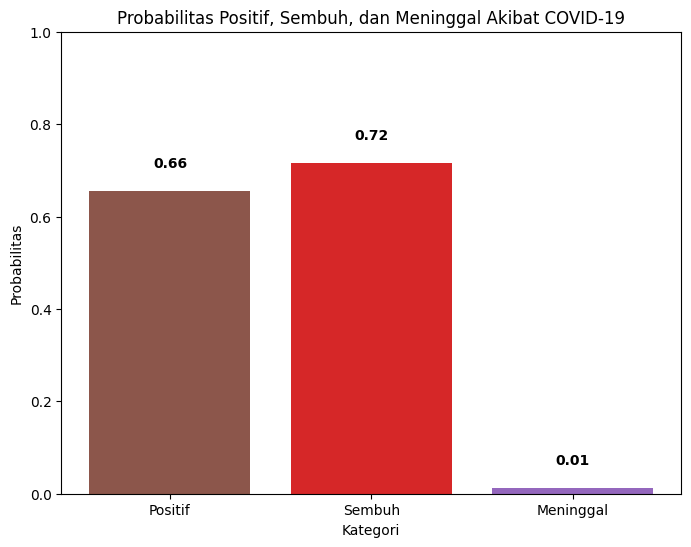

In [ ]:
categories = ['Positif', 'Sembuh', 'Meninggal']
probabilities = [(probabilitas_positif), probabilitas_sembuh, probabilitas_meninggal]

earth_tone_colors = ['#8c564b', '#d62728', '#9467bd']

plt.figure(figsize=(8, 6))

plt.bar(categories, probabilities, color=earth_tone_colors)
plt.title('Probabilitas Positif, Sembuh, dan Meninggal Akibat COVID-19')
plt.xlabel('Kategori')
plt.ylabel('Probabilitas')
plt.ylim(0, 1)

for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.05, f'{prob:.2f}', ha='center', color='black', fontweight='bold')

plt.show()

**Kesimpulan** :
* Nilai probabilitas kasus **positif** adalah 0.66, kasus **sembuh** adalah 0.72, dan kasus **meninggal** adalah 0.01
* Berdasarkan angka tersebut, dapat ditarik kesimpulan bahwa peluang seseorang positif COVID-19 tinggi. Namun, peluang seseorang untuk sembuh dari COVID-19 lebih tinggi daripada peluang seseorang positif COVID-19.
* Sehingga peluang seseorang bisa sembuh dapat dikatakan lumayan tinggi, dan kemungkinan seseorang meninggal karena COVID-19 sangat rendah.

###**3. Menghitung Distribusi Normal**

**3.1. Mengetahui Nilai Mean, Median, Kuartil Pertama, Kuartil Ketiga**

In [ ]:
df_selected['Sembuh'].describe()

count     30.000000
mean      19.000000
std       29.336337
min        0.000000
25%        3.250000
50%        6.000000
75%       18.500000
max      118.000000
Name: Sembuh, dtype: float64

* Jumlah data (count): 30
* Nilai rata-rata (mean): 19
* Standar deviasi (std): 29.336337
* Nilai minimum (min): 0
* Kuartil pertama (25%): 3.25
* Median (50%): 6.0
* Kuartil ketiga (75%): 18.5
* Nilai maksimum (max): 118

**3.2. Menghitung Nilai Probabilitas Kasus Sembuh Selama 3 Hari**

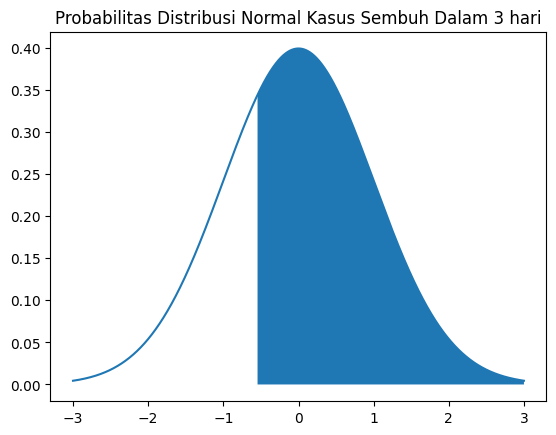

Probabilitas kasus sembuh dalam 3 hari adalah 70.72603297970556 %


In [ ]:
def countProbability(probValue):
  stdDev = df_selected['Sembuh'].std()
  mean = df_selected['Sembuh'].mean()
  size =  df_selected['Sembuh'].count()

  zScore = (probValue-mean)/stdDev # Rumus Distribusi Normal
  prob = norm.cdf(zScore)

  values = np.random.normal(mean, stdDev, size)

  x = np.arange(-3, 3, 0.001)
  y = norm.pdf(x, 0, 1)
  z=x[x > zScore]
  plt.plot(x, y)
  plt.fill_between(z, 0, norm.pdf(z, 0, 1))
  plt.title('Probabilitas Distribusi Normal Kasus Sembuh Dalam 3 hari')
  plt.show()

  return prob

def countProbabilityInPercent(probValue):
  prob = countProbability(probValue)
  return (1-prob)*100

x = 3
print(f"Probabilitas kasus sembuh dalam {x} hari adalah {(countProbabilityInPercent(x))} %")